In [1]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [172]:
seattle_listing_df = pd.read_csv("./seattle/listings.csv")

In [173]:
seattle_listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [185]:
# Print The Dataset shape
seattle_listing_df.shape

(3818, 92)

In [186]:
seattle_listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [187]:
seattle_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [188]:

# Drop duplicate columns
seattle_listing_df = seatle_listing_df.T.drop_duplicates().T

In [189]:
seattle_listing_df.head(5)

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [55]:
# Drop columns with full NA
seatle_listing_df.dropna(axis=1, how='all', inplace=True)

In [95]:
Seatle_listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [190]:
# Drop columns with only one unique value
seattle_listing_df.drop([c for c in seatle_listing_df.columns if seatle_listing_df[c].nunique()==1], axis=1, inplace=True)

In [191]:
seattle_listing_df.head(4)

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.0


In [97]:
# Drop columns with only one unique value
seatle_listing_df.drop([c for c in seatle_listing_df.columns if seatle_listing_df[c].nunique()==1], axis=1, inplace=True)

In [98]:
seatle_listing_df.head(4)

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN


In [192]:
# Drop columns representing url
seattle_listing_df.drop(seatle_listing_df.columns[seatle_listing_df.columns.str.contains("url")], axis=1, inplace=True)

In [193]:
seattle_listing_df.head()
seattle_calendar_df = pd.read_csv("./seattle/calendar.csv")
seattle_calendar_df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [194]:
# Print The Dataset shape
seattle_listing_df.shape

(3818, 52)

In [136]:
# Reformat the money related columns
#seatle_listing_df.price = seatle_listing_df.price.str.replace('[\$,]', '', regex=True).astype("float")
#seatle_listing_df.weekly_price = seatle_listing_df.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
#seatle_listing_df.monthly_price = seatle_listing_df.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
#seatle_listing_df.security_deposit = seatle_listing_df.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
#seatle_listing_df.cleaning_fee = seatle_listing_df.cleaning_fee.str.replace(r"$", "").str.replace(r"$", "").str.replace(",", "").astype("float32")
#seatle_listing_df.extra_people = seatle_listing_df.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

In [195]:
seattle_listing_df.head()

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [156]:
# Dropping specified columns with high missing values
columns_to_drop = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Dropping host-related information (selecting by pattern)
host_related_columns = seatle_listing_df.columns[seatle_listing_df.columns.str.contains('^host_')]
columns_to_drop.extend(host_related_columns)

# Dropping the columns
#seatle_listing_df.drop(columns=columns_to_drop, inplace=True)

In [196]:
seattle_listing_df.head()

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [157]:
# Listing the numerical and categorical columns
numerical_columns = seatle_listing_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = seatle_listing_df.select_dtypes(include=object).columns.tolist()
seatle_listing_df[numerical_columns].head()
seatle_listing_df[categorical_columns].head()
# Convert columns to numeric and coerce errors
#seatle_listing_df[numerical_columns] = seatle_listing_df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Verify that all columns in numerical_columns are numeric
print(seatle_listing_df[numerical_columns].dtypes)
# Check numerical_columns content
#print(numerical_columns)
#print(categorical_columns)

accommodates            float64
bathrooms               float64
bedrooms                float64
price                   float64
minimum_nights          float64
maximum_nights          float64
availability_365        float64
number_of_reviews       float64
review_scores_rating    float64
dtype: object


In [198]:
# Dealing With Null Values
# Numeric columns: Use median imputation
numeric_imputer = SimpleImputer(strategy='median')
seattle_listing_df[numerical_columns] = numeric_imputer.fit_transform(seatle_listing_df[numerical_columns])

# Categorical columns with mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
seattle_listing_df[categorical_columns] = categorical_imputer.fit_transform(seatle_listing_df[categorical_columns])

In [199]:
# Summary statistics for price
seattle_listing_df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [200]:
# Average number of bedrooms
seattle_listing_df['bedrooms'].mean()

np.float64(1.3072289156626506)

In [201]:
# Average number of bathrooms
seattle_listing_df['bathrooms'].mean()

np.float64(1.2583813514929283)

In [202]:
# Average review scores rating
seattle_listing_df['review_scores_rating'].mean()

np.float64(94.78679937139864)

In [203]:
# Estimating occupancy rates Seatle
average_annual_availability = seattle_listing_df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate

np.float64(32.938998399793334)

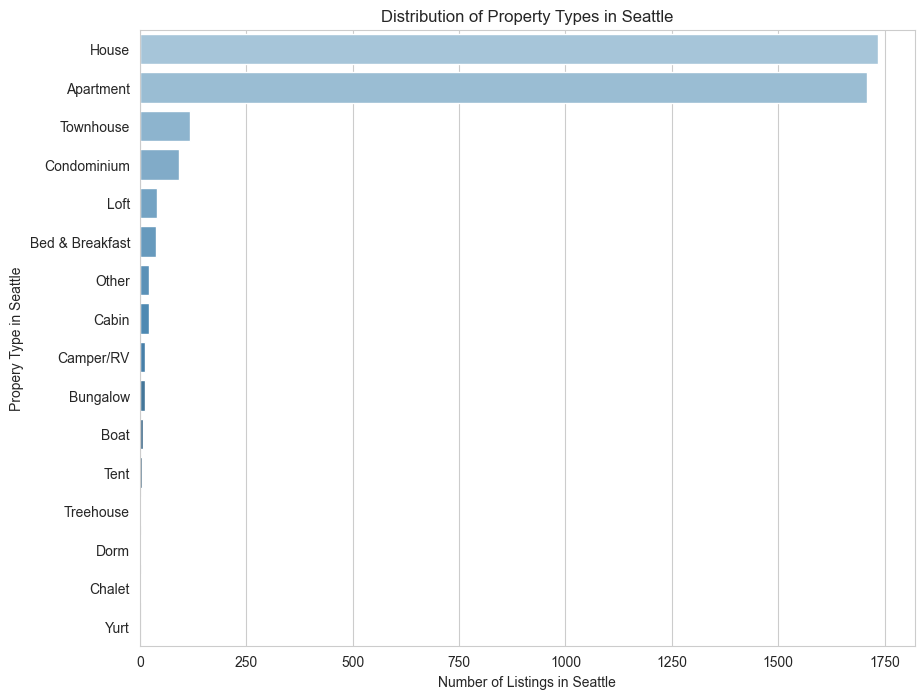

In [204]:
# Distribution of Property Types in Seatle
sns.set_style("whitegrid")  # Set the aesthetic style of the plots

# Calculate the distribution of the property types
property_type_counts_seatle = seattle_listing_df['property_type'].value_counts()

# Create a bar chart for the distribution of property types
plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts_seatle.values, y=property_type_counts_seatle.index, palette="Blues_d")
plt.title("Distribution of Property Types in Seattle")
plt.xlabel("Number of Listings in Seattle")
plt.ylabel("Propery Type in Seattle")
plt.show()

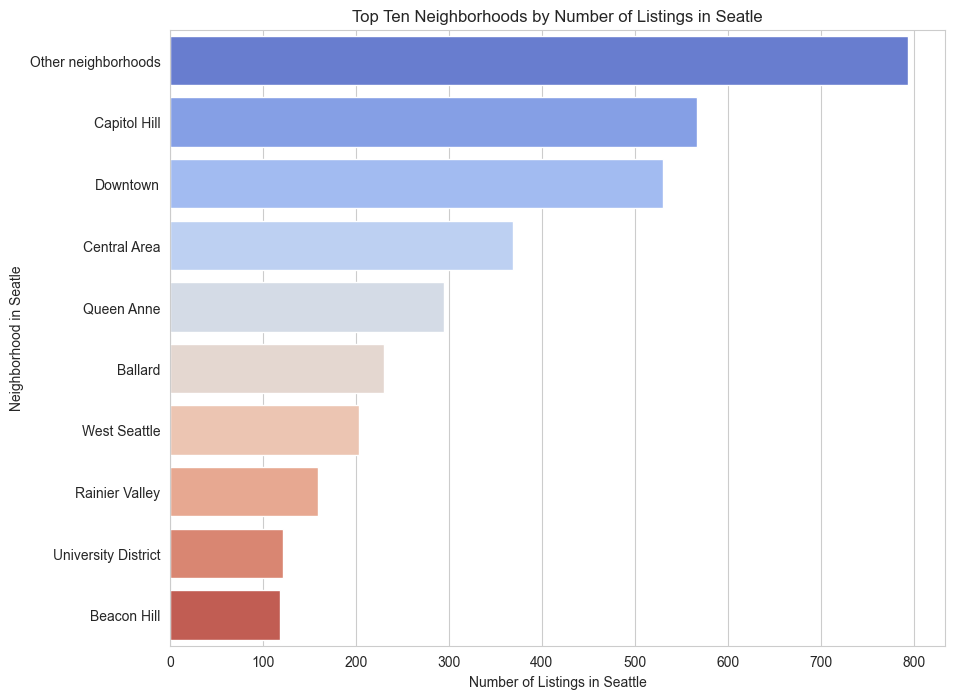

In [174]:
# Distribution of Neighborhoods Seatle
neighborhood_counts = seatle_listing_df['neighbourhood_group_cleansed'].value_counts().head(10) # Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings
plt.figure(figsize=(10, 8))
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="coolwarm")
plt.title('Top Ten Neighborhoods by Number of Listings in Seatle')
plt.xlabel('Number of Listings in Seattle')
plt.ylabel('Neighborhood in Seatle')
plt.show()

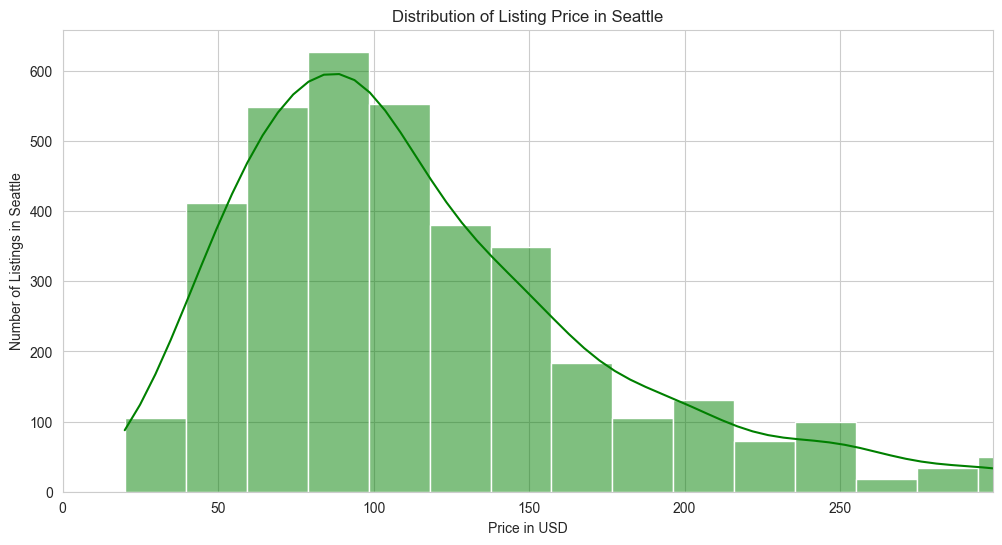

In [205]:
# Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(seattle_listing_df['price'], bins=50, kde=True, color="green")
plt.title('Distribution of Listing Price in Seattle')
plt.xlabel('Price in USD')
plt.ylabel('Number of Listings in Seattle')
plt.xlim(0, seatle_listing_df['price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

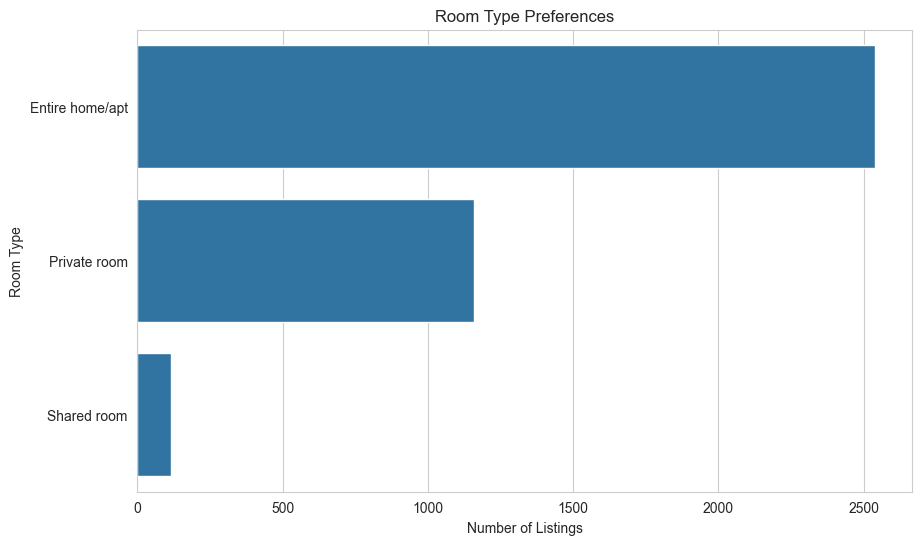

In [124]:
# Room Type Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=seatle_listing_df, y='room_type', order=seatle_listing_df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

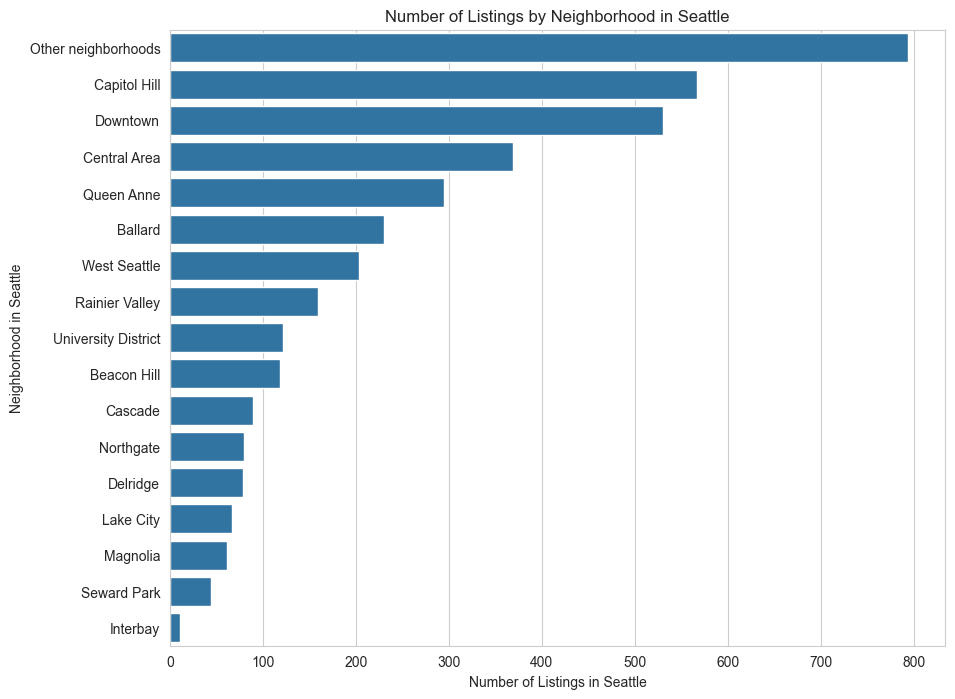

In [209]:
# Compare the Number of Listings by Neighborhood
plt.figure(figsize=(10, 8))
sns.countplot(data=seattle_listing_df, y='neighbourhood_group_cleansed', order=seattle_listing_df['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Number of Listings by Neighborhood in Seattle')
plt.xlabel('Number of Listings in Seattle')
plt.ylabel('Neighborhood in Seattle')
plt.show()

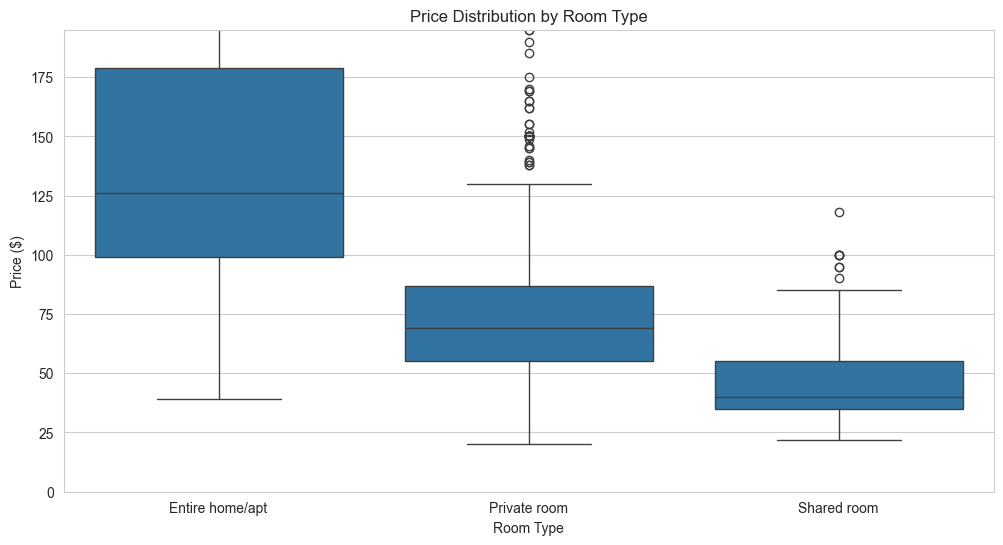

In [207]:
# Price by Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=seattle_listing_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, seattle_listing_df['price'].quantile(0.85))  # Limiting y-axis to 85th percentile for better visualization
plt.show()

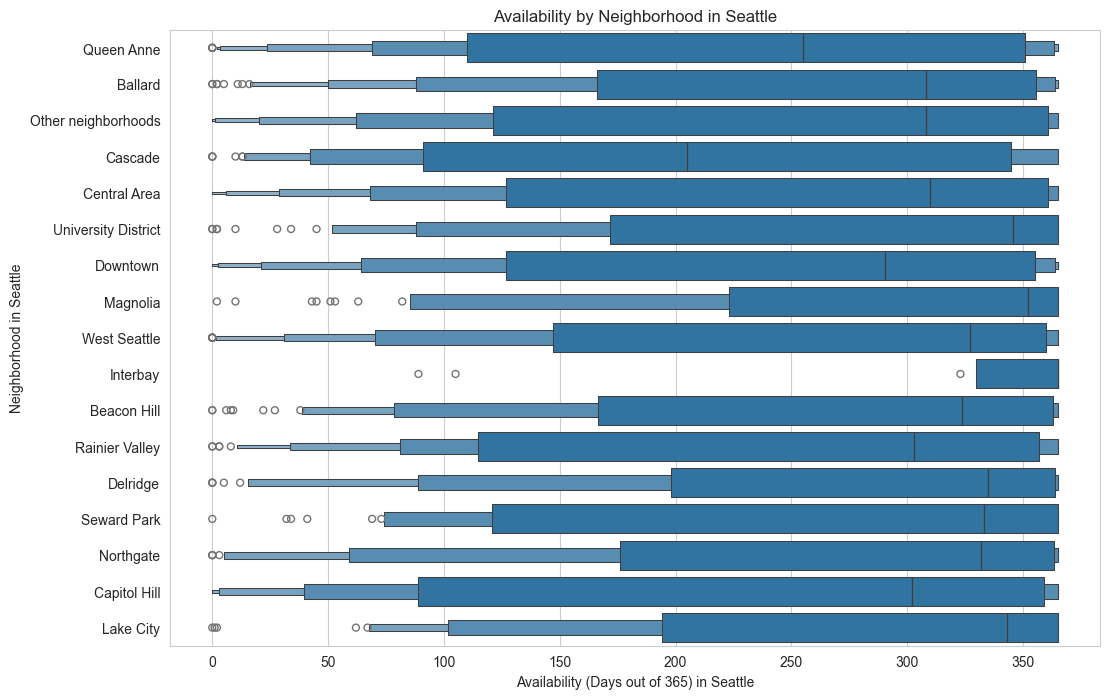

In [184]:
# Compare Availability by Neighborhood Properties listing 
plt.figure(figsize=(12, 8))
sns.boxenplot(y='neighbourhood_group_cleansed', x='availability_365', data=seatle_listing_df)
plt.title('Availability by Neighborhood in Seattle')
plt.xlabel('Availability (Days out of 365) in Seattle')
plt.ylabel('Neighborhood in Seattle')
plt.show()

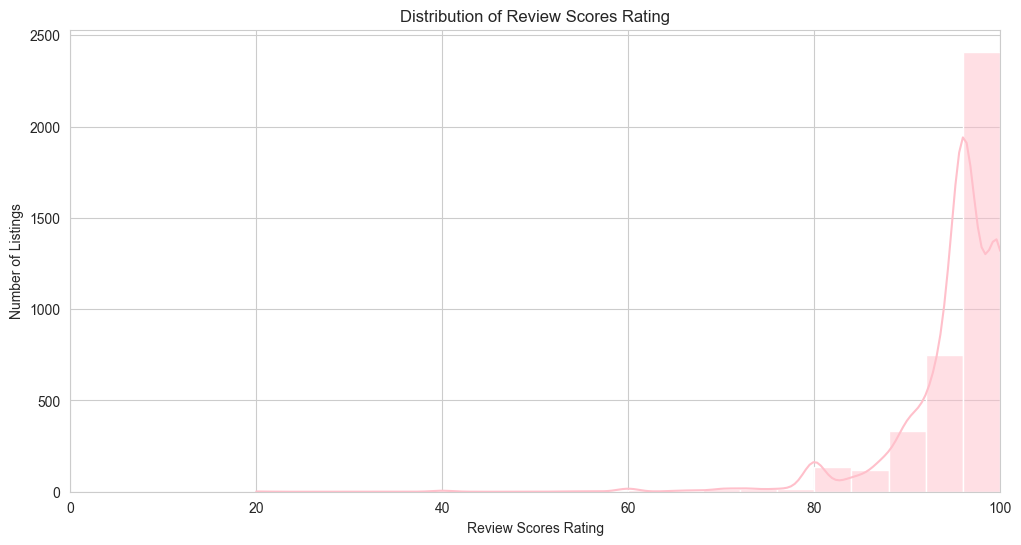

In [208]:
# Review Scores Rating Distribution
plt.figure(figsize=(12, 6))
sns.histplot(seattle_listing_df['review_scores_rating'], bins=20, kde=True, color='pink')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  # Review scores are typically on a scale from 0 to 100
plt.show()